### Introduction
Last Update- Jan 7, 2024  
Author- Shefali C.

This notebook:  
- takes a table copied from a blog,
- converts it to a Pandas dataframe after a series of steps,
- then cleans and stores it in a csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#table copied from: URL- https://www.w3schools.com/python/pandas/pandas_cleaning.asp
table_data = """
    Duration          Date  Pulse  Maxpulse  Calories
  60  '2020/12/01'    110       130     409.1
  60  '2020/12/02'    117       145     479.0
  60  '2020/12/03'    103       135     340.0
  45  '2020/12/04'    109       175     282.4
  45  '2020/12/05'    117       148     406.0
  60  '2020/12/06'    102       127     300.0
  60  '2020/12/07'    110       136     374.0
  450  '2020/12/08'    104       134     253.3
  30  '2020/12/09'    109       133     195.1
  60  '2020/12/10'     98       124     269.0
  60  '2020/12/11'    103       147     329.3
  60  '2020/12/12'    100       120     250.7
  60  '2020/12/12'    100       120     250.7
  60  '2020/12/13'    106       128     345.3
  60  '2020/12/14'    104       132     379.3
  60  '2020/12/15'     98       123     275.0
  60  '2020/12/16'     98       120     215.2
  60  '2020/12/17'    100       120     300.0
  45  '2020/12/18'     90       112       NaN
  60  '2020/12/19'    103       123     323.0
  45  '2020/12/20'     97       125     243.0
  60  '2020/12/21'    108       131     364.2
  45           NaN    100       119     282.0
  60  '2020/12/23'    130       101     300.0
  45  '2020/12/24'    105       132     246.0
  60  '2020/12/25'    102       126     334.5
  60    2020/12/26    100       120     250.0
  60  '2020/12/27'     92       118     241.0
  60  '2020/12/28'    103       132       NaN
  60  '2020/12/29'    100       132     280.0
  60  '2020/12/30'    102       129     380.3
  60  '2020/12/31'     92       115     243.0
  """

In [3]:
list_of_rows = table_data.strip().splitlines()

In [4]:
list_of_rows

['Duration          Date  Pulse  Maxpulse  Calories',
 "  60  '2020/12/01'    110       130     409.1",
 "  60  '2020/12/02'    117       145     479.0",
 "  60  '2020/12/03'    103       135     340.0",
 "  45  '2020/12/04'    109       175     282.4",
 "  45  '2020/12/05'    117       148     406.0",
 "  60  '2020/12/06'    102       127     300.0",
 "  60  '2020/12/07'    110       136     374.0",
 "  450  '2020/12/08'    104       134     253.3",
 "  30  '2020/12/09'    109       133     195.1",
 "  60  '2020/12/10'     98       124     269.0",
 "  60  '2020/12/11'    103       147     329.3",
 "  60  '2020/12/12'    100       120     250.7",
 "  60  '2020/12/12'    100       120     250.7",
 "  60  '2020/12/13'    106       128     345.3",
 "  60  '2020/12/14'    104       132     379.3",
 "  60  '2020/12/15'     98       123     275.0",
 "  60  '2020/12/16'     98       120     215.2",
 "  60  '2020/12/17'    100       120     300.0",
 "  45  '2020/12/18'     90       112       N

In [5]:
#take out the first row which will form column name
colnames = list_of_rows[0].split()

In [6]:
colnames

['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']

In [7]:
#take each row from 2nd row onwards and split them into individual lists
data_rows = [row.split(maxsplit = len(colnames)-1) for row in list_of_rows[1:]]

In [8]:
#display sample of the output
data_rows[0:6] #NOTE: each value is surrounded by single quotes, these will be removed in cleaning steps.

[['60', "'2020/12/01'", '110', '130', '409.1'],
 ['60', "'2020/12/02'", '117', '145', '479.0'],
 ['60', "'2020/12/03'", '103', '135', '340.0'],
 ['45', "'2020/12/04'", '109', '175', '282.4'],
 ['45', "'2020/12/05'", '117', '148', '406.0'],
 ['60', "'2020/12/06'", '102', '127', '300.0']]

In [9]:
#Transpose these rows into columns
#this clubs corresponding values in each row into 1 column.
#e.g. 60, 50, 60, 45, .. gets clubbed into one tuple, dates get clubbed into 1 tuple
# each tuple representing one column-to-be in our dataframe
t_data_rows = list(zip(*data_rows))

In [10]:
#display
#t_data_rows

In [11]:
#Form a dictionary of column-name with these columns created above.
#Take one column name from "colnames", make it key.
#take one corresponding indexed tuple from "t_data_rows" and make it value.
dict_data = {colnames[i] : list(t_data_rows[i]) for i in range(len(colnames))}

In [12]:
#View the dictionary
print(dict_data["Duration"])

['60', '60', '60', '45', '45', '60', '60', '450', '30', '60', '60', '60', '60', '60', '60', '60', '60', '60', '45', '60', '45', '60', '45', '60', '45', '60', '60', '60', '60', '60', '60', '60']


In [13]:
#convert this dictionary to dataframe
df = pd.DataFrame(dict_data)

In [14]:
#View the dataframe
df.head(4)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4


In [15]:
#Check the datatype of each column
df.info() #all are string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Duration  32 non-null     object
 1   Date      32 non-null     object
 2   Pulse     32 non-null     object
 3   Maxpulse  32 non-null     object
 4   Calories  32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


### Fix Data Types of Columns

In [16]:
#Duration- convert to integer type
df.Duration = df.Duration.astype(int)

In [17]:
# Date- convert to datetime type

#remove the single quotes from date values
df.Date = df.Date.astype(str).str.strip("'")

In [18]:
#convert to datetime type
df.Date = pd.to_datetime(df.Date, format="%Y/%m/%d")

In [19]:
#View the date column values
print(df.Date[:7])

0   2020-12-01
1   2020-12-02
2   2020-12-03
3   2020-12-04
4   2020-12-05
5   2020-12-06
6   2020-12-07
Name: Date, dtype: datetime64[ns]


In [20]:
#Pulse- convert to int
df.Pulse = df.Pulse.astype(int)

In [21]:
#Maxpulse- convert to int
df.Maxpulse = df.Maxpulse.astype(int)

In [22]:
#Calories- convert to Float
df.Calories = df.Calories.astype(float)

### Check for Missing Values

In [23]:
#missing values in entire dataframe
df.isna().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [24]:
#Check the row with NaT in Date column
df[df.Date.isna()]

,Duration,Date,Pulse,Maxpulse,Calories
22,45,NaT,100,119,282.0


In [25]:
#Impute this NaT with Dec 1, 2020. (all dates in this dummy dataset are days in December 2020)
df.fillna({'Date': pd.Timestamp('2020-12-01')}, inplace=True)

In [26]:
#check row 22 again
df.loc[22,:]

Duration                     45
Date        2020-12-01 00:00:00
Pulse                       100
Maxpulse                    119
Calories                  282.0
Name: 22, dtype: object

In [27]:
#Replace 2 NaN values in Calories with the median value.
#find the median
median_cals = df['Calories'].median()
df.fillna({'Calories':median_cals}, inplace=True)

In [28]:
#check for NA's now in the df
df.isna().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

### Check for anomalies

In [29]:
df.drop('Date', axis=1).describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,32.000000
mean,68.437500,103.500000,128.500000,303.837500
std,70.039591,7.832933,12.998759,63.925152
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,341.325000
max,450.000000,130.000000,175.000000,479.000000


#### 1. Duration Column- Max value is 450!

Seems like a data-entry error

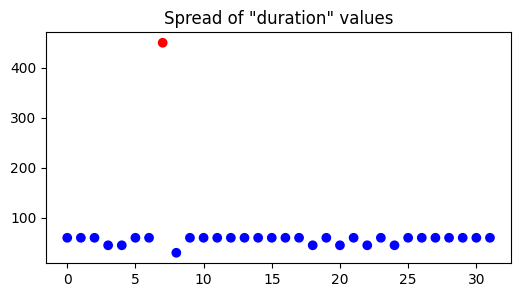

In [30]:
#Creating boxplot for 1st column- the max value is way beyond 75th percentile.
#create color maps for far-off points
colors = ['red' if x > 60 else 'blue' for x in df['Duration']]
##plot
plt.figure(figsize = (6,3))
plt.scatter(range(len(df)), df['Duration'], c=colors)
plt.title('Spread of "duration" values')
plt.show()

In [31]:
#Find out index of rows where duration > 60 
df[df['Duration'] > 60]

,Duration,Date,Pulse,Maxpulse,Calories
7,450,2020-12-08,104,134,253.3


In [32]:
#Replace duration value at index 7 with 45
df.loc[7, 'Duration'] = 45

In [33]:
#check the value of this row again..
df.loc[7,:]

Duration                     45
Date        2020-12-08 00:00:00
Pulse                       104
Maxpulse                    134
Calories                  253.3
Name: 7, dtype: object

#### 2. Column- Pulse

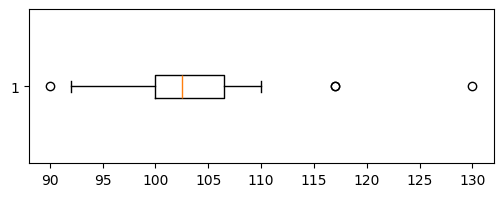

In [34]:
plt.figure(figsize = (6, 2))
plt.boxplot(df.Pulse, vert=False)
plt.show()

#### 3. Column- Maxpulse

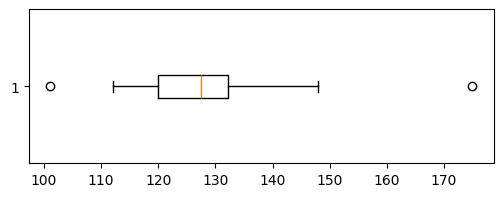

In [35]:
plt.figure(figsize = (6,2))
plt.boxplot(df.Maxpulse, vert=False)
plt.show()

#### 4. Column- Calories

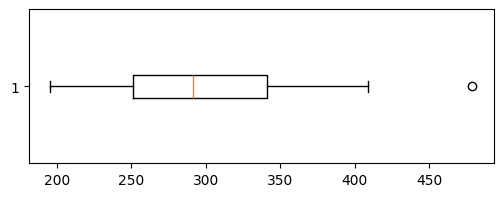

In [36]:
plt.figure(figsize = (6,2))
plt.boxplot(df.Calories, vert=False)
plt.show()

### Duplicate Rows

**`keep=False`** makes sure all duplicate rows get included, not just 1 copy of the row.  
- Default value of keep is **"first"** which only marks second or more occurances as duplicates, excludes the first.
- So, if requirement is to see all copies, then use **keep=False**

In [37]:
#check for duplicate rows
df[df.duplicated(keep=False)]

,Duration,Date,Pulse,Maxpulse,Calories
11,60,2020-12-12,100,120,250.7
12,60,2020-12-12,100,120,250.7


In [38]:
#remove the second duplicate row
df.drop_duplicates(inplace=True)

In [39]:
#check again--none
df[df.duplicated(keep=False)]

,Duration,Date,Pulse,Maxpulse,Calories


In [40]:
#save the dataframe as csv
df.to_csv('sample_data.csv')